In [24]:
import torch

torch.manual_seed(1024) # 设置随机数种子，保证每次运行结果一致

In [25]:
x = torch.linspace(100, 300, 200) # 生成一个从100到300的等差数列，共200个数
x = (x - torch.mean(x)) / torch.std(x) # 标准化
epsilon = torch.randn(200) # 生成一个服从标准正态分布的随机数
y = 10 * x + 5 + epsilon # 生成y

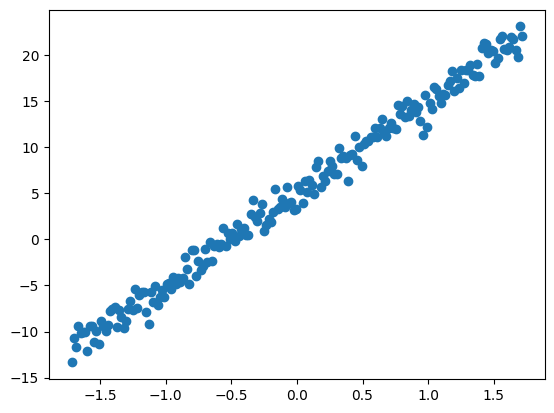

In [26]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

In [27]:
from sklearn import linear_model

m = linear_model.LinearRegression()
m.fit(x.view(-1, 1), y) 

LinearRegression()

In [28]:
m.coef_, m.intercept_

(array([9.934816], dtype=float32), 5.093296)

In [29]:
# 梯度下降
import torch.nn as nn  

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.a = nn.Parameter(torch.zeros(()))
        self.b = nn.Parameter(torch.zeros(())) # 初始化参数a和b为0
        
    def forward(self, x):
        return self.a * x + self.b
    
    def string(self): # 打印模型参数
        return 'y = {:.2f} * x + {:.2f}'.format(self.a.item(), self.b.item())

In [30]:
model = LinearRegression()
model(x)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<AddBackward0>)

In [31]:
print(list(model.parameters()))

[Parameter containing:
tensor(0., requires_grad=True), Parameter containing:
tensor(0., requires_grad=True)]


In [34]:
import torch.optim as optim

learning_rate = 0.1
model = LinearRegression()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(20):
    y_pred = model(x)
    loss = (y - y_pred).pow(2).mean()
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    print(model.string())

y = 1.98 * x + 1.02
y = 3.56 * x + 1.83
y = 4.83 * x + 2.49
y = 5.85 * x + 3.01
y = 6.66 * x + 3.42
y = 7.31 * x + 3.76
y = 7.83 * x + 4.03
y = 8.25 * x + 4.24
y = 8.59 * x + 4.41
y = 8.85 * x + 4.55
y = 9.07 * x + 4.66
y = 9.24 * x + 4.74
y = 9.38 * x + 4.81
y = 9.49 * x + 4.87
y = 9.58 * x + 4.91
y = 9.65 * x + 4.95
y = 9.71 * x + 4.98
y = 9.75 * x + 5.00
y = 9.79 * x + 5.02
y = 9.82 * x + 5.03


In [35]:
learning_rate = 0.1
model = LinearRegression()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(20):
    y_pred = model(x)
    loss = (y - y_pred).pow(2).mean()
    # optimizer.zero_grad()
    
    loss.backward()
    
    #optimizer.step()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            param.grad.zero_()
    print(model.string())

y = 1.98 * x + 1.02
y = 3.56 * x + 1.83
y = 4.83 * x + 2.49
y = 5.85 * x + 3.01
y = 6.66 * x + 3.42
y = 7.31 * x + 3.76
y = 7.83 * x + 4.03
y = 8.25 * x + 4.24
y = 8.59 * x + 4.41
y = 8.85 * x + 4.55
y = 9.07 * x + 4.66
y = 9.24 * x + 4.74
y = 9.38 * x + 4.81
y = 9.49 * x + 4.87
y = 9.58 * x + 4.91
y = 9.65 * x + 4.95
y = 9.71 * x + 4.98
y = 9.75 * x + 5.00
y = 9.79 * x + 5.02
y = 9.82 * x + 5.03


In [36]:
# 随机梯度下降
learning_rate = 0.1
batch_size = 20
model = LinearRegression()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(20):
    for i in range(0, len(x), batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        y_pred = model(x_batch)
        loss = (y_batch - y_pred).pow(2).mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(model.string())
    

y = 8.22 * x + 6.48
y = 9.94 * x + 5.21
y = 10.03 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10
y = 10.02 * x + 5.10


In [37]:
# tensor基本操作

In [38]:
torch.zeros(2, 3) # 生成一个2x3的全0张量
torch.zeros_like(torch.tensor([[1, 2], [3, 4]])) # 生成一个与输入张量形状相同的全0张量

tensor([[0, 0],
        [0, 0]])

In [39]:
torch.randn(2, 3) # 生成一个2x3的服从标准正态分布的张量

tensor([[1.9050, 0.1757, 1.2764],
        [0.6187, 3.2715, 0.6103]])

In [42]:
a = torch.randn(2,3,4) # 生成一个2x3x4的服从标准正态分布的张量, 三维张量

In [43]:
a.unsqueeze(0).shape # 在第0维插入一个维度

torch.Size([1, 2, 3, 4])

In [44]:
b  =a.unsqueeze(0)
b

tensor([[[[-0.9570,  1.0534,  0.8338, -1.4176],
          [-1.1318, -0.5106,  0.5255, -0.1985],
          [ 0.2249, -0.0543, -0.0232, -0.1009]],

         [[ 0.1448,  2.1733, -1.5689,  0.0620],
          [-0.7975, -1.5424,  2.0915, -0.7324],
          [ 0.8878,  0.3669, -0.7002, -0.2175]]]])

In [50]:
print(b.squeeze(0).shape) # 去掉第0维，如果去掉的维度不为1，则不会去掉，例如b.squeeze(1)不会去掉第1维
b.squeeze(0)

torch.Size([2, 3, 4])


tensor([[[-0.9570,  1.0534,  0.8338, -1.4176],
         [-1.1318, -0.5106,  0.5255, -0.1985],
         [ 0.2249, -0.0543, -0.0232, -0.1009]],

        [[ 0.1448,  2.1733, -1.5689,  0.0620],
         [-0.7975, -1.5424,  2.0915, -0.7324],
         [ 0.8878,  0.3669, -0.7002, -0.2175]]])

In [51]:
data = torch.tensor(range(10))
data

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
data.view(2, 5) # 改变张量形状

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [53]:
data.view(5,-1) # -1表示自动计算

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [54]:
d1 = data.view(2, 5)
t1 = d1.t() # 转置

In [55]:
d1.view(-1) # 展平

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
d1.view(1,10) # 增加维度

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [60]:
t1.contiguous().view(1,10) # 对于内存连续的张量，可以直接增加维度；而对于非内存连续的张量，需要先调用contiguous()方法或reshape方法

tensor([[0, 5, 1, 6, 2, 7, 3, 8, 4, 9]])

In [61]:
a = torch.tensor(range(1,7)).view(2,3)
b = torch.tensor(range(7,13)).view(2,3)
a.shape, b.shape

(torch.Size([2, 3]), torch.Size([2, 3]))

In [63]:
a,b,a *b # 逐元素相乘，即点乘

(tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 tensor([[ 7, 16, 27],
         [40, 55, 72]]))

In [65]:
b = torch.tensor(range(1,4)).view(3)
b.shape, b

(torch.Size([3]), tensor([1, 2, 3]))

In [66]:
a,b,a * b # 广播

(tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([1, 2, 3]),
 tensor([[ 1,  4,  9],
         [ 4, 10, 18]]))

In [67]:
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 4)
mat1, mat2, torch.mm(mat1, mat2) # 矩阵乘法 

(tensor([[ 0.0511, -0.0017,  0.4959],
         [ 0.0336,  0.5328, -1.5030]]),
 tensor([[-0.6293, -0.1259,  0.5030,  0.8911],
         [-0.4720,  0.3638,  0.7726, -0.7716],
         [ 0.7776, -0.9514,  0.5585,  0.3405]]),
 tensor([[ 0.3542, -0.4788,  0.3013,  0.2157],
         [-1.4412,  1.6195, -0.4109, -0.8930]]))

In [68]:
(mat1 @ mat2).shape # 矩阵乘法

torch.Size([2, 4])

In [69]:
mat1 = torch.randn(5, 1, 3, 4)  # (5, 1, 3, 4)
mat2 = torch.randn(8, 4, 5)     # (   8, 4, 5)
(mat1 @ mat2).shape  

torch.Size([5, 8, 3, 5])